In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import os

In [3]:
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
folder_path

'C:\\Users\\samko\\Desktop\\Files\\UNI\\DP'

In [23]:
image = cv2.imread(r''+folder_path+r'\Datasets\ORIGA\Images\014.jpg')
label = loadmat(r''+folder_path+r'\Datasets\ORIGA\Labels\014.mat', variable_names='mask').get('mask')

In [24]:
def crop_image(img, crop_perc_height, crop_perc_width):
        '''
        Crops the image, cutting from height and width depending on crop_perc.
        '''
        height, width = img.shape[:2]
        h_crop = int((crop_perc_height/100*height)//2)
        w_crop = int((crop_perc_width/100*width)//2)
        return img[h_crop:(height-h_crop), w_crop:(width-w_crop)]

In [25]:
image = crop_image(np.array(image), 30, 50)
label = crop_image(np.array(label), 30, 50)

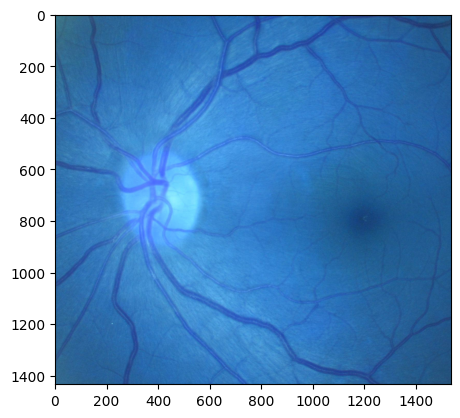

In [26]:
plt.imshow(image)

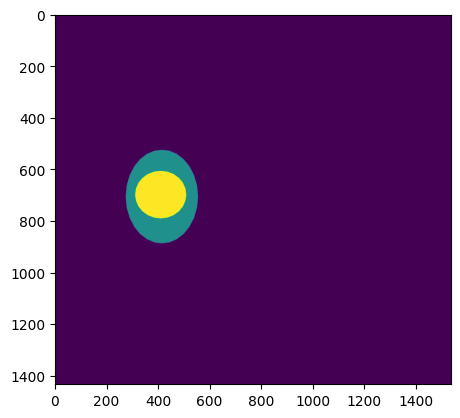

In [27]:
plt.imshow(label)

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

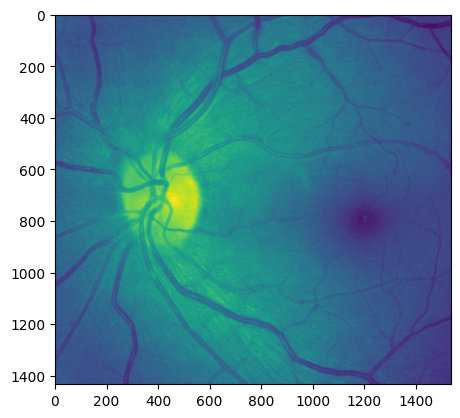

In [29]:
plt.imshow(gray)

In [30]:
equalized = cv2.equalizeHist(gray)

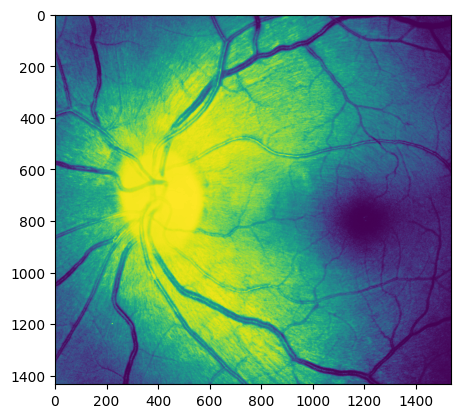

In [31]:
plt.imshow(equalized)

In [32]:
#binary = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, binary = cv2.threshold(equalized, 240, 255, cv2.THRESH_BINARY)

In [33]:
# # # Apply morphological operations to remove noise
# kernel = np.ones((5, 5), np.uint8)
# binary = cv2.erode(binary, kernel, iterations=1)
# binary = cv2.dilate(binary, kernel, iterations=1)

In [34]:
# Vein enhancement using top-hat transform
#tophat = cv2.morphologyEx(equalized, cv2.MORPH_TOPHAT, kernel)

In [14]:
# Combine the binary image with the vein-enhanced image
#combined = cv2.addWeighted(binary, 1, tophat, 0.5, 0)

In [35]:
contours, x = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
#filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) < 500]  # You need to define 'threshold_area'

In [36]:
largest_contour = max(contours, key=cv2.contourArea)

In [37]:
x, y, w, h = cv2.boundingRect(largest_contour)

In [38]:
cropped_image = image[y:y+h, x:x+w]
cropped_label = label[y:y+h, x:x+w]

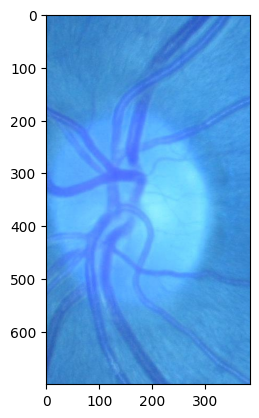

In [39]:
plt.imshow(cropped_image)

In [40]:
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

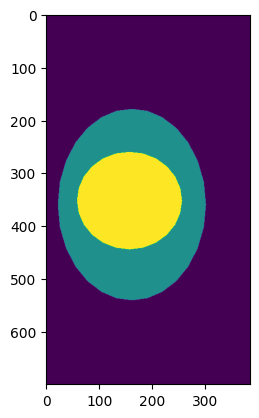

In [41]:
plt.imshow(cropped_label)